In [84]:
#iport necessarsy libaries
import numpy as np
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

In [85]:
#Importing the CSV FILE
df_tele= pd.read_csv('TelcoCustomerChurn.csv')
df_tele

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [86]:
#Replace empty values in totalcharge swith NAN
df_tele['TotalCharges'] = df_tele['TotalCharges'].replace(" ",np.nan)

In [87]:
print ("\nMissing values :  ", df_tele.isnull().sum().values.sum())


Missing values :   11


In [124]:
#convert to float type
df_tele["TotalCharges"] = df_tele["TotalCharges"].astype(float)

In [89]:
#Drop customer ID as it wont affect the churning rate at all
df_tele.drop(['customerID'], axis=1, inplace=True)

In [90]:
#Changing the values from out target (churn to numeric 1s and 0s)
df_tele['Churn'] = df_tele['Churn'].map(lambda s :1  if s =='Yes' else 0)
df_tele

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,0
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0


In [ ]:
#Seperate column for male and female 
#df_tele = pd.get_dummies(data=df_tele, columns=['gender'])

In [91]:
#Changing values of Partner to numeric for better processing (0s and 1s)
df_tele['Partner'] = df_tele['Partner'].map(lambda s :1 if s =='Yes' else 0)
df_tele

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,0,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,0,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,0,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,Female,0,0,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
6,Male,0,0,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0
7,Female,0,0,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,0
8,Female,0,1,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
9,Male,0,0,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0


In [92]:
#Similarily repeat for other features where it is possible to classify into binary values 
#Dependents, PhoneServices, PaperlessBilling 
df_tele['Dependents'] = df_tele['Dependents'].map(lambda s :1 if s =='Yes' else 0)
df_tele['PhoneService'] = df_tele['PhoneService'].map(lambda s :1 if s =='Yes' else 0)
df_tele['PaperlessBilling'] = df_tele['PaperlessBilling'].map(lambda s :1 if s =='Yes' else 0)
df_tele

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
5,Female,0,0,0,8,1,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,99.65,820.50,1
6,Male,0,0,1,22,1,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,1,Credit card (automatic),89.10,1949.40,0
7,Female,0,0,0,10,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,0,Mailed check,29.75,301.90,0
8,Female,0,1,0,28,1,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,1,Electronic check,104.80,3046.05,1
9,Male,0,0,1,62,1,No,DSL,Yes,Yes,No,No,No,No,One year,0,Bank transfer (automatic),56.15,3487.95,0


In [93]:
#For MutipleLines we can see 3 categorial values yes no and NO phone Service 
#After analysing we can consider NoPhoneService as also NO 
#Therefore we can convert this into numNo phone service
df_tele['MultipleLines'].replace('No phone service','No', inplace=True)
df_tele['MultipleLines'] = df_tele['MultipleLines'].map(lambda s :1 if s =='Yes' else 0)
df_tele

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
5,Female,0,0,0,8,1,1,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,99.65,820.50,1
6,Male,0,0,1,22,1,1,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,1,Credit card (automatic),89.10,1949.40,0
7,Female,0,0,0,10,0,0,DSL,Yes,No,No,No,No,No,Month-to-month,0,Mailed check,29.75,301.90,0
8,Female,0,1,0,28,1,1,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,1,Electronic check,104.80,3046.05,1
9,Male,0,0,1,62,1,0,DSL,Yes,Yes,No,No,No,No,One year,0,Bank transfer (automatic),56.15,3487.95,0


In [94]:
df_tele['Has_InternetService'] = df_tele['InternetService'].map(lambda s :0 if s == 'No' else 1)

In [95]:
#Similar procedure for OnlineSecurity
df_tele['OnlineSecurity'].replace('No phone service','No', inplace=True)
df_tele['OnlineSecurity'] = df_tele['OnlineSecurity'].map(lambda s :1 if s =='Yes' else 0)
#OnlineBackup
df_tele['OnlineBackup'].replace('No phone service','No', inplace=True)
df_tele['OnlineBackup'] = df_tele['OnlineBackup'].map(lambda s :1 if s =='Yes' else 0)
#StreamingTV
df_tele['StreamingTV'].replace('No phone service','No', inplace=True)
df_tele['StreamingTV'] = df_tele['StreamingTV'].map(lambda s :1 if s =='Yes' else 0)
#StreamingMovies
df_tele['StreamingMovies'].replace('No phone service','No', inplace=True)
df_tele['StreamingMovies'] = df_tele['StreamingMovies'].map(lambda s :1 if s =='Yes' else 0)
#DeviceProtection
df_tele['DeviceProtection'].replace('No phone service','No', inplace=True)
df_tele['DeviceProtection'] = df_tele['DeviceProtection'].map(lambda s :1 if s =='Yes' else 0)
#TechSupport
df_tele['TechSupport'].replace('No phone service','No', inplace=True)
df_tele['TechSupport'] = df_tele['TechSupport'].map(lambda s :1 if s =='Yes' else 0)
df_tele

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Has_InternetService
0,Female,0,1,0,1,0,0,DSL,0,1,...,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1
1,Male,0,0,0,34,1,0,DSL,1,0,...,0,0,0,One year,0,Mailed check,56.95,1889.50,0,1
2,Male,0,0,0,2,1,0,DSL,1,1,...,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1
3,Male,0,0,0,45,0,0,DSL,1,0,...,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1
4,Female,0,0,0,2,1,0,Fiber optic,0,0,...,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,1
5,Female,0,0,0,8,1,1,Fiber optic,0,0,...,0,1,1,Month-to-month,1,Electronic check,99.65,820.50,1,1
6,Male,0,0,1,22,1,1,Fiber optic,0,1,...,0,1,0,Month-to-month,1,Credit card (automatic),89.10,1949.40,0,1
7,Female,0,0,0,10,0,0,DSL,1,0,...,0,0,0,Month-to-month,0,Mailed check,29.75,301.90,0,1
8,Female,0,1,0,28,1,1,Fiber optic,0,0,...,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1,1
9,Male,0,0,1,62,1,0,DSL,1,1,...,0,0,0,One year,0,Bank transfer (automatic),56.15,3487.95,0,1


[Text(0, 0, '0%'),
 Text(0, 0, '10%'),
 Text(0, 0, '20%'),
 Text(0, 0, '30%'),
 Text(0, 0, '40%'),
 Text(0, 0, '50%'),
 Text(0, 0, '60%')]

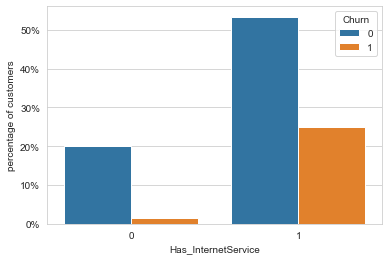

In [81]:
#Plot MutipleLines attribute
Has_Internet_Churn = df_tele.groupby("Has_InternetService")["Churn"].value_counts().to_frame()
Has_Internet_Churn = Has_Internet_Churn.rename({"Churn": "percentage of customers"}, axis=1).reset_index()
#print(Partner_Churn)
Has_Internet_Churn["percentage of customers"] = Has_Internet_Churn["percentage of customers"]/len(df_tele)
ax = sns.barplot(x="Has_InternetService", y="percentage of customers", hue='Churn', data=Has_Internet_Churn)
ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


In [111]:
#Making a seperate column for DSL and Fiber optic with converted values 1s and 0s
df_tele['Fiber_optic'] = df_tele['InternetService'].map(lambda s :1  if s =='Fiber optic' else 0)
df_tele['DSL'] = df_tele['InternetService'].map(lambda s :1  if s =='DSL' else 0)

In [ ]:
#For internet Servie who have a DSL connection 
g = sns.FacetGrid(df_tele, col="Has_InternetService", height=4, aspect=.9)
ax = g.map(sns.barplot, "DSL", "Churn", palette = "Blues_d", order= [0, 1])

In [52]:
#Gives some key deatils about our DataFrame
#df_tele.describe()

In [53]:
#to check for any null or NaN values in the DF 
#df_tele.isnull().sum()

In [110]:
#2_d Scatter plot wiht color-coding for each feature type 
#sns.set_style("whitegrid");
#sns.FacetGrid(banktrans, hue="Churn", size=10) \
 #   .map(plt.scatter,"MonthlyCharges","PaymentMethod") \
 #  .add_legend()
#sns.pairplot(df_tele,hue="Churn",size=4);
#plt.show();

#From the plot below we can conclude that people who
#------------------------* Are relativly new
#- ----------------------* have higher monthly charges
#------------------------* and total charges <2000
# are more likely to churn--------------------

In [112]:
#Plot how Senior citize
SenCit_Churn = df_tele.groupby("SeniorCitizen")["Churn"].value_counts().to_frame()
SenCit_Churn = SenCit_Churn.rename({"Churn": "percentage of customers"}, axis=1).reset_index()
SenCit_Churn["percentage of customers"] = SenCit_Churn["percentage of customers"]/len(df_tele)
SenCit_Churn

,SeniorCitizen,Churn,percentage of customers
0,0,0,0.640068
1,0,1,0.197785
2,1,0,0.094562
3,1,1,0.067585


[Text(0, 0, '0%'),
 Text(0, 0, '10%'),
 Text(0, 0, '20%'),
 Text(0, 0, '30%'),
 Text(0, 0, '40%'),
 Text(0, 0, '50%'),
 Text(0, 0, '60%'),
 Text(0, 0, '70%')]

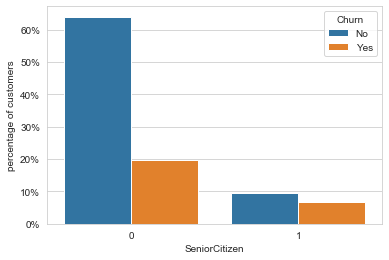

In [56]:
 
ax = sns.barplot(x="SeniorCitizen", y="percentage of customers", hue='Churn', data=SenCit_Churn)
ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])

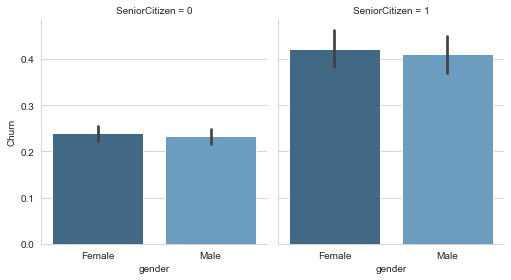

In [68]:
g = sns.FacetGrid(df_tele, col="SeniorCitizen", height=4, aspect=.9)
ax = g.map(sns.barplot, "gender", "Churn", palette = "Blues_d", order= ['Female', 'Male'])

[Text(0, 0, '0%'),
 Text(0, 0, '5%'),
 Text(0, 0, '10%'),
 Text(0, 0, '15%'),
 Text(0, 0, '20%'),
 Text(0, 0, '25%'),
 Text(0, 0, '30%'),
 Text(0, 0, '35%'),
 Text(0, 0, '40%'),
 Text(0, 0, '45%')]

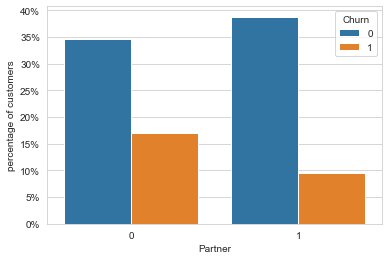

In [113]:
#Plot Partner attribute
Partner_Churn = df_tele.groupby("Partner")["Churn"].value_counts().to_frame()
Partner_Churn = Partner_Churn.rename({"Churn": "percentage of customers"}, axis=1).reset_index()
#print(Partner_Churn)
Partner_Churn["percentage of customers"] = Partner_Churn["percentage of customers"]/len(df_tele)
ax = sns.barplot(x="Partner", y="percentage of customers", hue='Churn', data=Partner_Churn)
ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])

[Text(0, 0, '0%'),
 Text(0, 0, '10%'),
 Text(0, 0, '20%'),
 Text(0, 0, '30%'),
 Text(0, 0, '40%'),
 Text(0, 0, '50%'),
 Text(0, 0, '60%')]

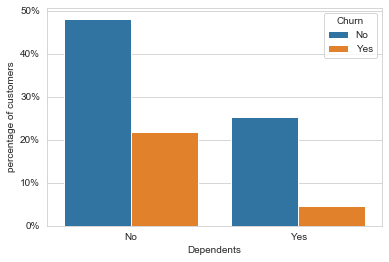

In [62]:
#Plot dependents attribute
Dependent_Churn = df_tele.groupby("Dependents")["Churn"].value_counts().to_frame()
Dependent_Churn = Dependent_Churn.rename({"Churn": "percentage of customers"}, axis=1).reset_index()
#print(Partner_Churn)
Dependent_Churn["percentage of customers"] = Dependent_Churn["percentage of customers"]/len(df_tele)
ax = sns.barplot(x="Dependents", y="percentage of customers", hue='Churn', data=Dependent_Churn)
ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


[Text(0, 0, '0%'),
 Text(0, 0, '10%'),
 Text(0, 0, '20%'),
 Text(0, 0, '30%'),
 Text(0, 0, '40%'),
 Text(0, 0, '50%')]

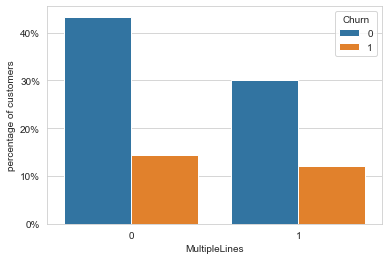

In [114]:
#Plot MutipleLines attribute
MutipleLines_Churn = df_tele.groupby("MultipleLines")["Churn"].value_counts().to_frame()
MutipleLines_Churn = MutipleLines_Churn.rename({"Churn": "percentage of customers"}, axis=1).reset_index()
#print(Partner_Churn)
MutipleLines_Churn["percentage of customers"] = MutipleLines_Churn["percentage of customers"]/len(df_tele)
ax = sns.barplot(x="MultipleLines", y="percentage of customers", hue='Churn', data=MutipleLines_Churn)
ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


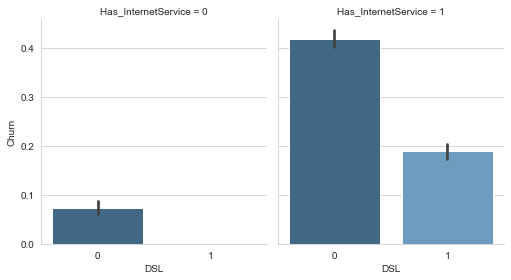

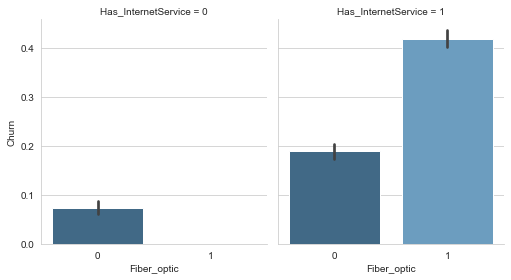

In [116]:
#For internet Servie who have a DSL connection 
g = sns.FacetGrid(df_tele, col="Has_InternetService", height=4, aspect=.9)
ax = g.map(sns.barplot, "DSL", "Churn", palette = "Blues_d", order= [0, 1])
#For internet Servie who have a Fiber Optic connection 
g = sns.FacetGrid(df_tele, col="Has_InternetService", height=4, aspect=.9)
ax = g.map(sns.barplot, "Fiber_optic", "Churn", palette = "Blues_d", order= [0, 1])
#For customer with no Internet Service 
g = sns.FacetGrid(df_tele, col="Has_InternetService", height=4, aspect=.9)
ax = g.map(sns.barplot, "Fiber_optic", "Churn", palette = "Blues_d", order= [0, 1])


[Text(0, 0, '0%'),
 Text(0, 0, '2%'),
 Text(0, 0, '5%'),
 Text(0, 0, '8%'),
 Text(0, 0, '10%'),
 Text(0, 0, '12%'),
 Text(0, 0, '15%'),
 Text(0, 0, '18%'),
 Text(0, 0, '20%')]

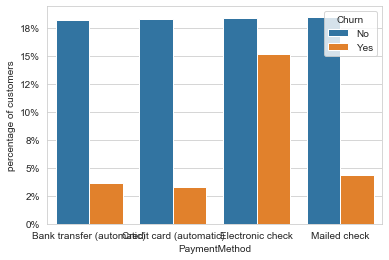

In [65]:
#Plot Internet attribute
Payment_Churn = df_tele.groupby("PaymentMethod")["Churn"].value_counts().to_frame()
Payment_Churn = Payment_Churn.rename({"Churn": "percentage of customers"}, axis=1).reset_index()
#print(Partner_Churn)
Payment_Churn["percentage of customers"] = Payment_Churn["percentage of customers"]/len(df_tele)
ax = sns.barplot(x="PaymentMethod", y="percentage of customers", hue='Churn', data=Payment_Churn)
ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


C:\Users\clive\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


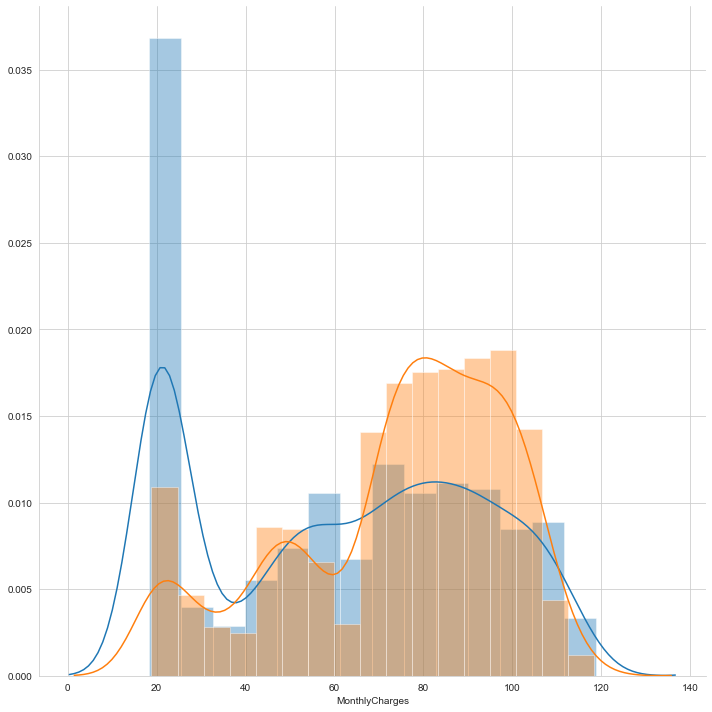

In [119]:
#2_d Scatter plot wiht color-coding for each feature type 
sns.set_style("whitegrid");
sns.FacetGrid(df_tele, hue="Churn", size=10) \
   .map(sns.distplot,"MonthlyCharges")
plt.show();

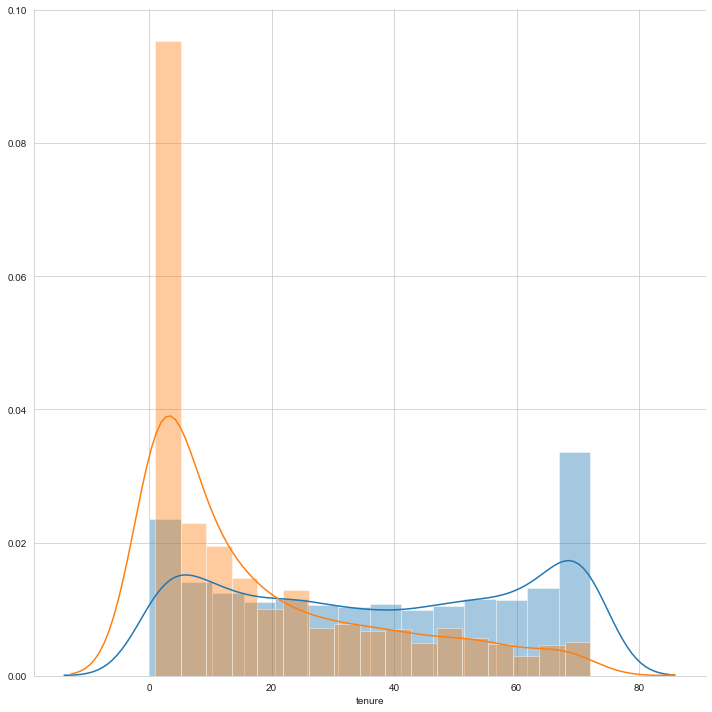

In [121]:
#2_d Scatter plot wiht color-coding for each feature type 
sns.set_style("whitegrid");
sns.FacetGrid(df_tele, hue="Churn", size=10) \
   .map(sns.distplot,"tenure")
plt.show();

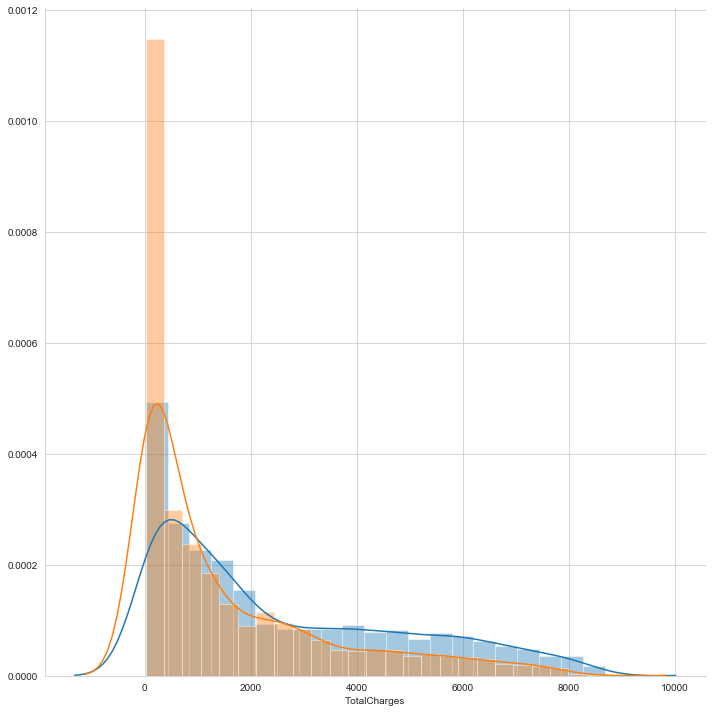

In [126]:
#2_d Scatter plot wiht color-coding for each feature type 
sns.set_style("whitegrid");
sns.FacetGrid(df_tele, hue="Churn", size=10) \
   .map(sns.distplot,"TotalCharges") 
plt.show();

In [ ]:
d